Source

https://keras.io/examples/keras_recipes/quasi_svm/

In [129]:
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from keras.models import Sequential # try tensorflow.keras.models in case of import error
from keras.layers import Dense # try tensorflow.keras.layers in case of import error
from sklearn.metrics import classification_report
# import training/testing dataset

training_df = pd.read_csv(Path("../Resources/training_dataset_original.csv"))
testing_df = pd.read_csv(Path("../Resources/testing_dataset.csv"))
# split training dataset to X and y

X_train = training_df.drop(columns="status")
y_train = training_df["status"]
# split testing dataset to X and y

X_test = testing_df.drop(columns="status")
y_test = testing_df["status"]

In [130]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures

In [131]:
model = keras.Sequential(
    [
        keras.Input(shape=(18,)),
        RandomFourierFeatures(
            output_dim=4096, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(units=1),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.hinge,
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
)

In [132]:
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
369/369 [==============================] - 2s 4ms/step - loss: 0.2263 - acc: 1.0000 - val_loss: 0.2302 - val_acc: 1.0000
Epoch 2/20
369/369 [==============================] - 1s 3ms/step - loss: 0.2083 - acc: 1.0000 - val_loss: 0.1795 - val_acc: 1.0000
Epoch 3/20
369/369 [==============================] - 1s 4ms/step - loss: 0.2066 - acc: 1.0000 - val_loss: 0.3104 - val_acc: 1.0000
Epoch 4/20
369/369 [==============================] - 1s 4ms/step - loss: 0.2024 - acc: 1.0000 - val_loss: 0.1830 - val_acc: 1.0000
Epoch 5/20
369/369 [==============================] - 2s 4ms/step - loss: 0.2075 - acc: 1.0000 - val_loss: 0.2919 - val_acc: 1.0000
Epoch 6/20
369/369 [==============================] - 1s 4ms/step - loss: 0.2045 - acc: 1.0000 - val_loss: 0.1788 - val_acc: 1.0000
Epoch 7/20
369/369 [==============================] - 2s 4ms/step - loss: 0.2040 - acc: 1.0000 - val_loss: 0.1546 - val_acc: 1.0000
Epoch 8/20
369/369 [==============================] - 1s 4ms/step - loss: 0.

In [133]:
# make prediction and print classification report
y_pred = model.predict(X_test)

y_pred.shape

615/615 [==============================] - 1s 1ms/step


(19671, 1)

In [134]:
y_pred = y_pred[:,0]
pd.Series(y_pred).describe()

count    19671.000000
mean        -2.808325
std          0.373824
min         -8.460121
25%         -2.788157
50%         -2.739321
75%         -2.731581
max          1.748330
dtype: float64

In [135]:
threshold = np.mean(y_pred) + np.std(y_pred)

In [136]:
pred = np.where(y_pred < threshold, 0, 1)

In [137]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18417
           1       0.15      0.05      0.08      1254

    accuracy                           0.92     19671
   macro avg       0.54      0.52      0.52     19671
weighted avg       0.89      0.92      0.90     19671



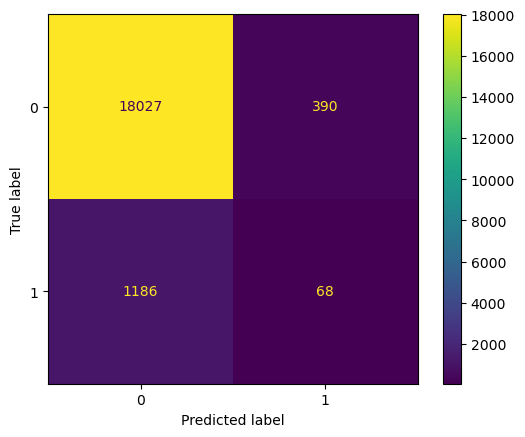

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, pred))
matrix.plot()
plt.show()

Source

https://stackoverflow.com/questions/54414392/convert-sklearn-svm-svc-classifier-to-keras-implementation/54415540#54415540

In [143]:
from keras.regularizers import l2

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(18,)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1, kernel_regularizer=l2(0.01)),
    tf.keras.layers.Softmax()                
])
model.compile(loss='squared_hinge',
              optimizer='adadelta',
              metrics=['accuracy'])
model.fit(X_train, y_train)
pred = model.predict(X_test)

615/615 [==============================] - 1s 1ms/step
